# Black Friday Sales Analysis

# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing Columns

In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['Product_ID'].nunique()

3623

In [9]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [15]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [16]:
for col in df.columns:
    print(col,":",df[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analyzing Gender

In [17]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data

,Ratio
Male,405380
Female,132197


<Axes: title={'center': 'Gender Ratio'}>

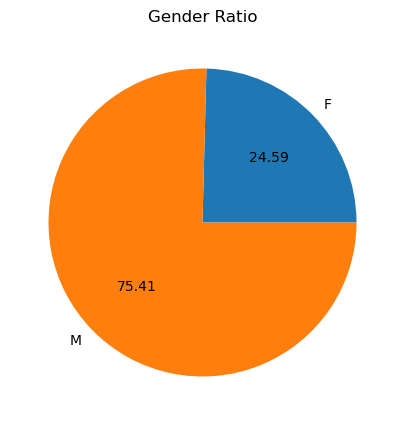

In [18]:
#Another approach for plotting the ratio
#data.plot.pie(y='Ratio',figsize=(4,4),autopct='%.2f')
df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',title='Gender Ratio',figsize=(5,5))

<Axes: xlabel='Gender'>

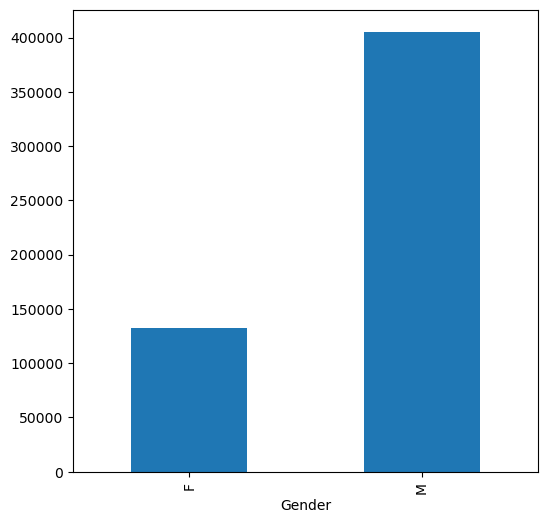

In [19]:
df.groupby('Gender').size().plot(kind='bar',figsize=(6,6))

In [20]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

# Analyzing age and marital status

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

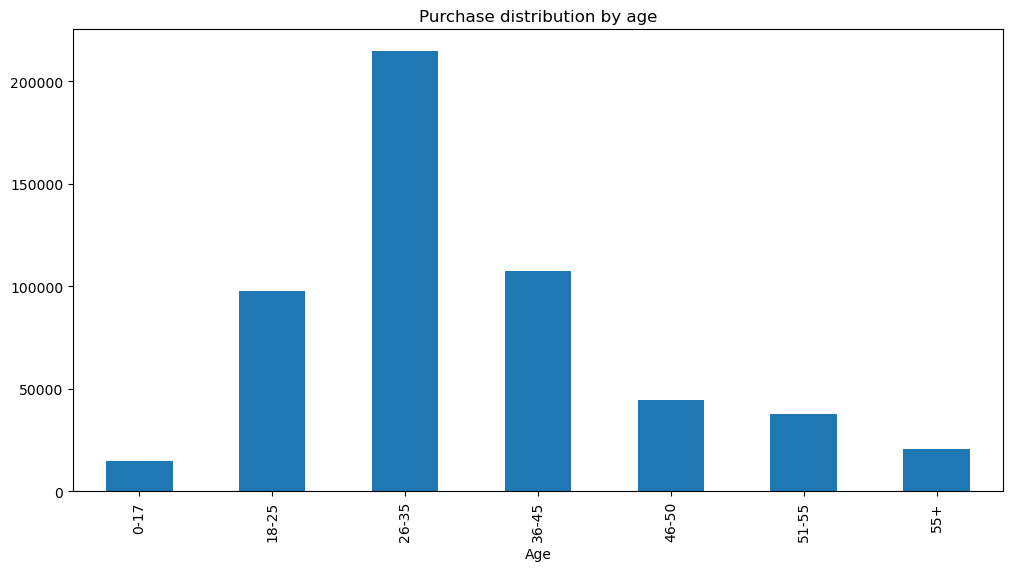

In [21]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title='Purchase distribution by age')

In [22]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])   

In [23]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

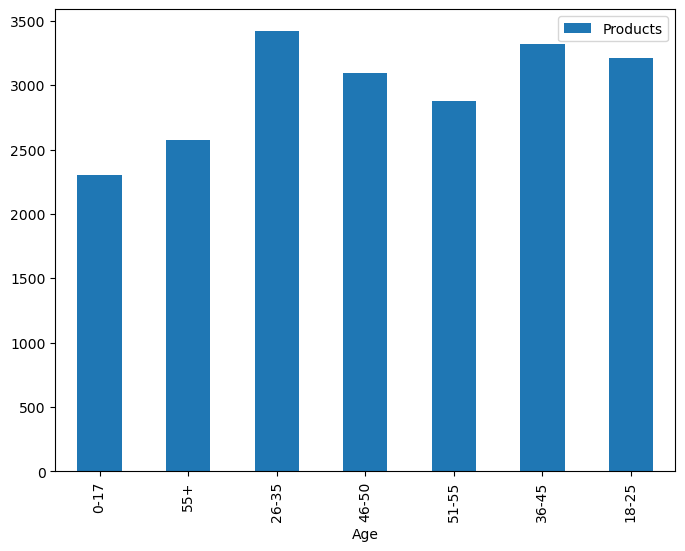

In [24]:
data.plot.bar(x='Age',figsize=(8,6))

<Axes: xlabel='Age'>

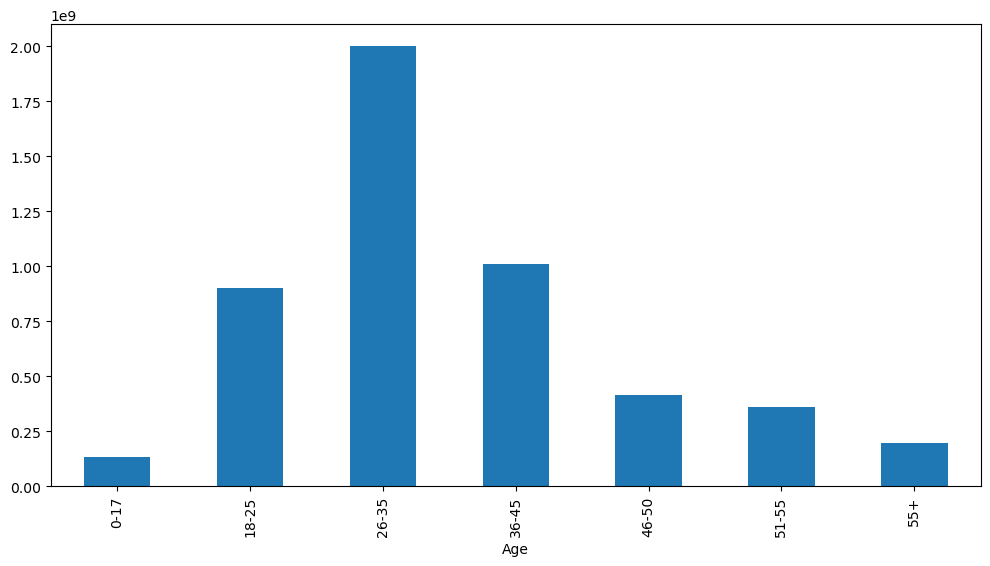

In [25]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12 ,6))

<Axes: ylabel='Purchase'>

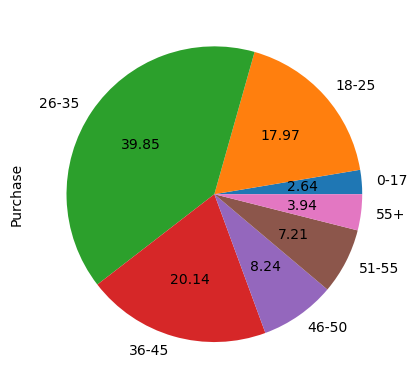

In [26]:
df.groupby('Age').sum()['Purchase'].plot(kind='pie',autopct='%0.2f')

<Axes: >

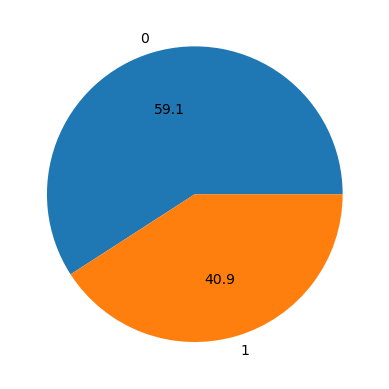

In [27]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f')

<Axes: >

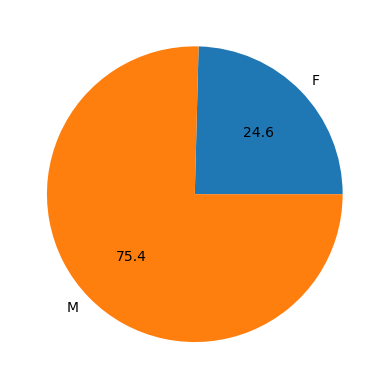

In [28]:
df.groupby('Gender').size().plot(kind='pie',autopct='%0.1f')

# Multi column analysis

<Axes: xlabel='Age', ylabel='count'>

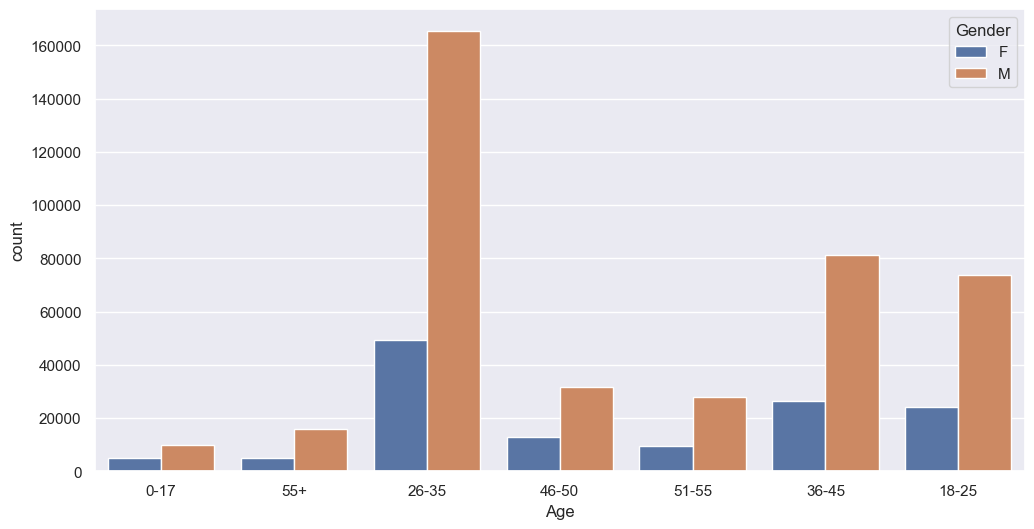

In [29]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='count'>

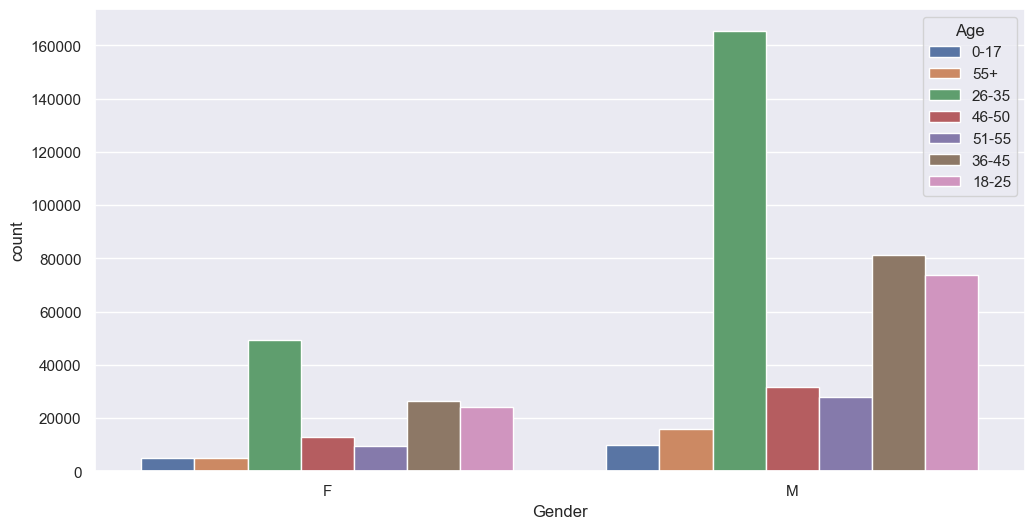

In [30]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)

<Axes: xlabel='Gender', ylabel='count'>

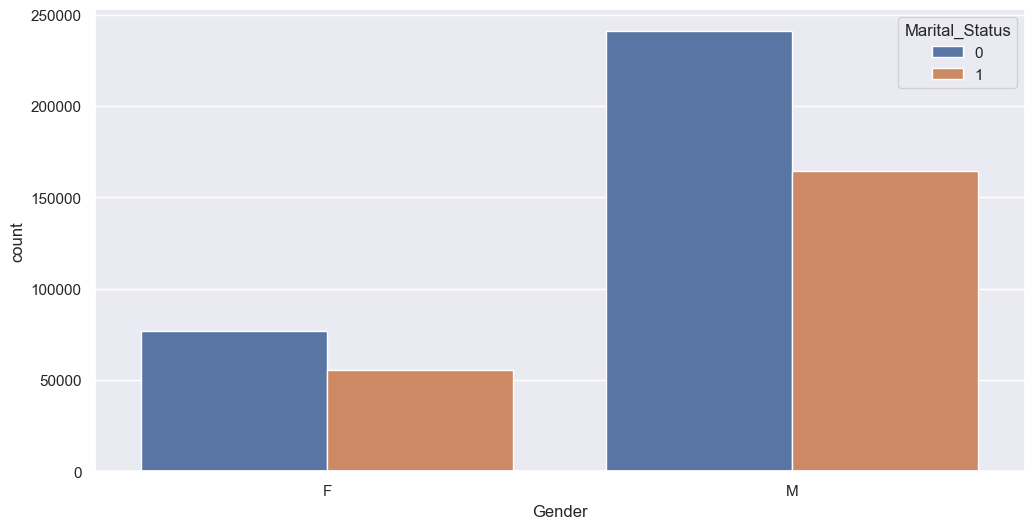

In [31]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Marital_Status",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

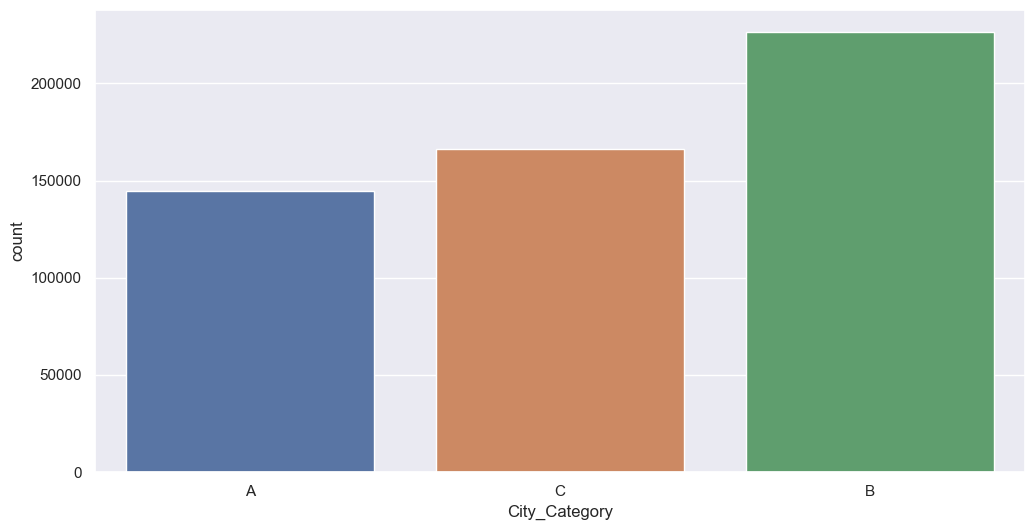

In [32]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

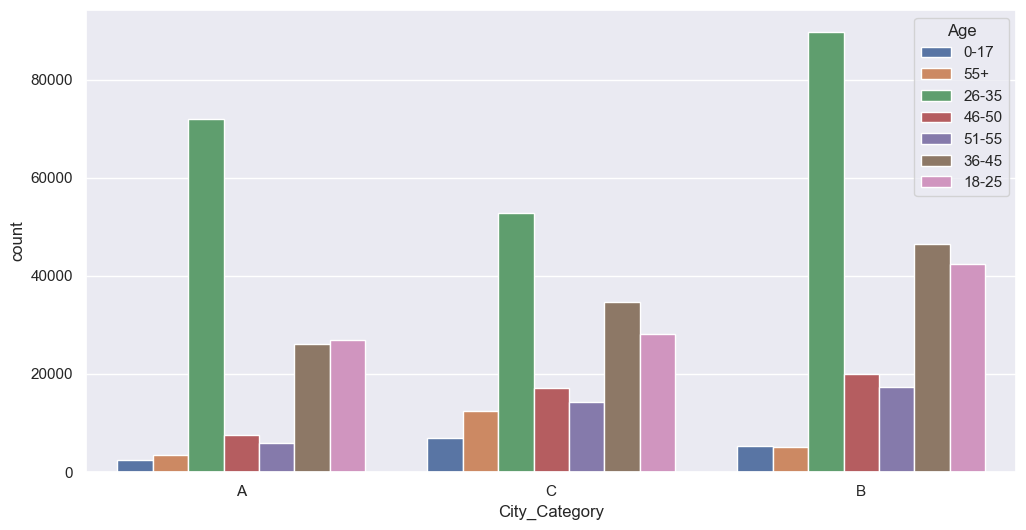

In [33]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

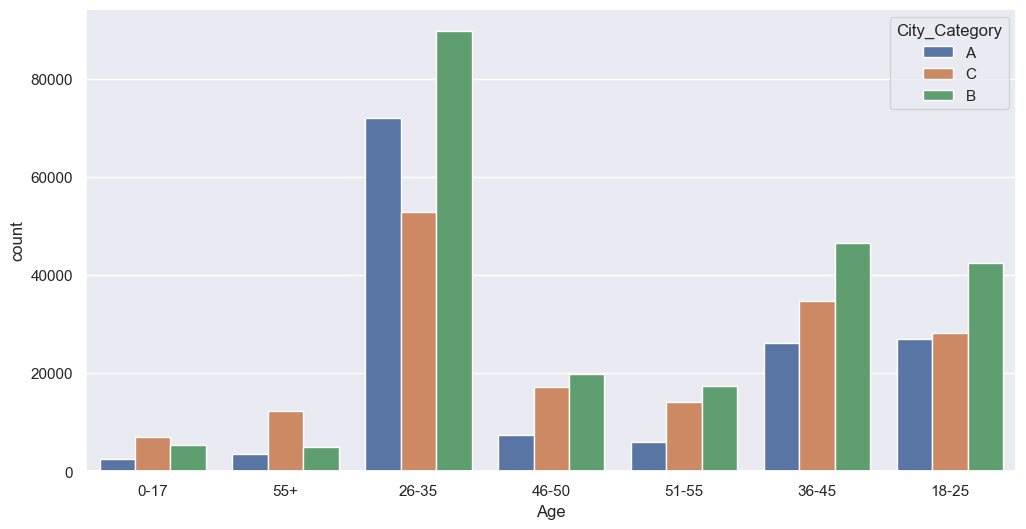

In [34]:
sns.countplot(x='Age',hue='City_Category',data=df)

<Axes: >

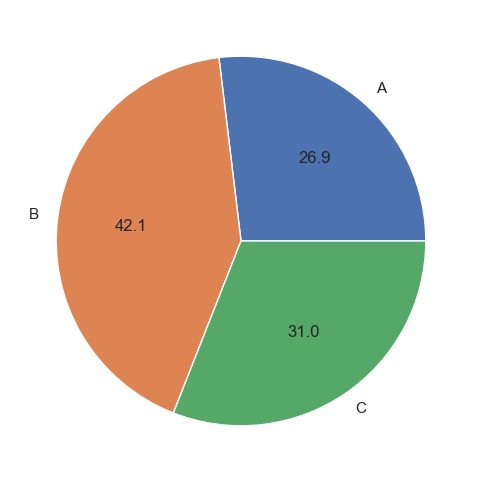

In [35]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%0.1f')

In [36]:
df.groupby("City_Category").sum()["Purchase"]

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

<Axes: xlabel='City_Category'>

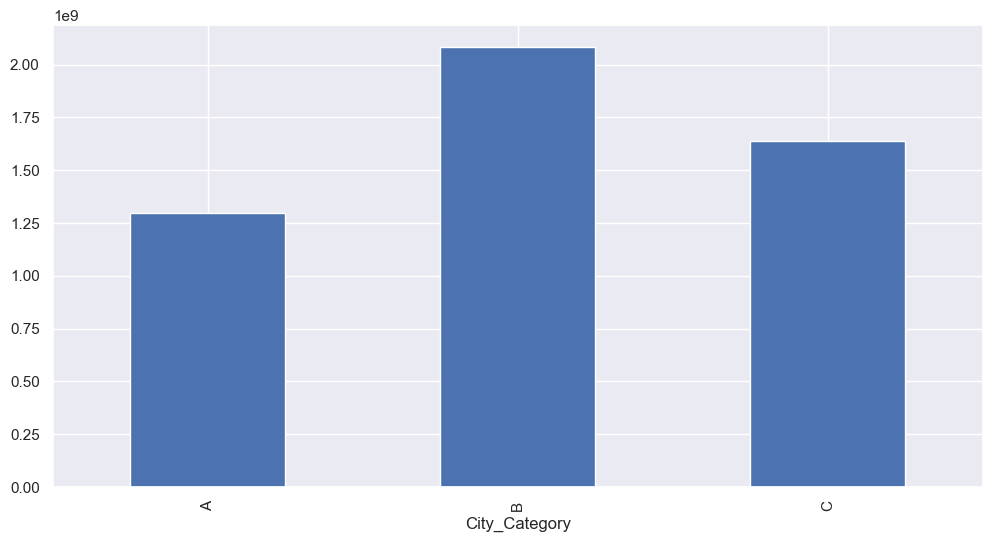

In [37]:
df.groupby("City_Category").sum()["Purchase"].plot(kind='bar')

<Axes: ylabel='Purchase'>

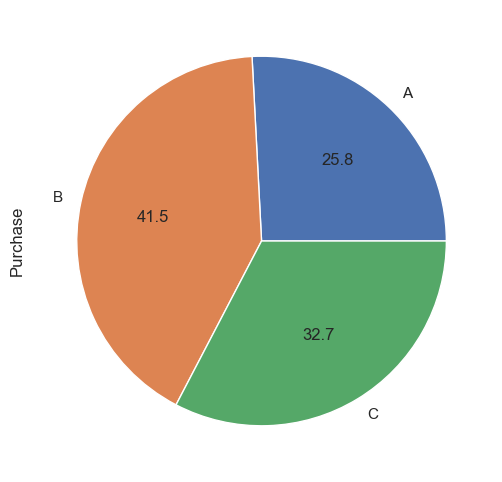

In [38]:
df.groupby("City_Category").sum()["Purchase"].plot(kind='pie',autopct='%0.1f')

# Occupation and Product Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

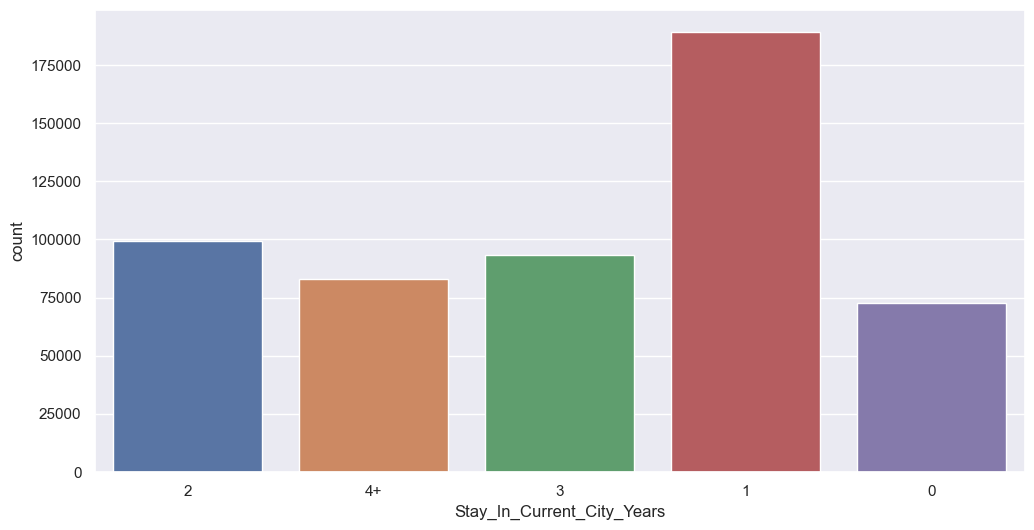

In [39]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<Axes: >

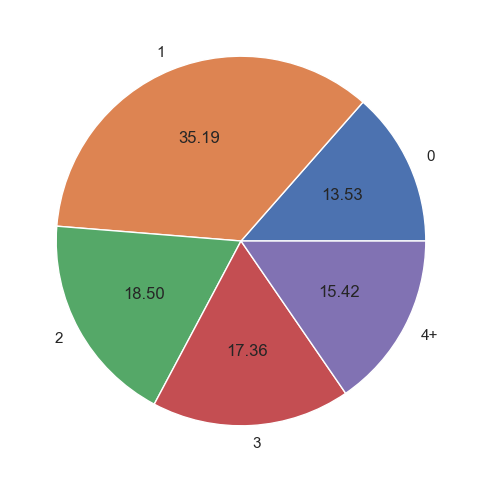

In [45]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

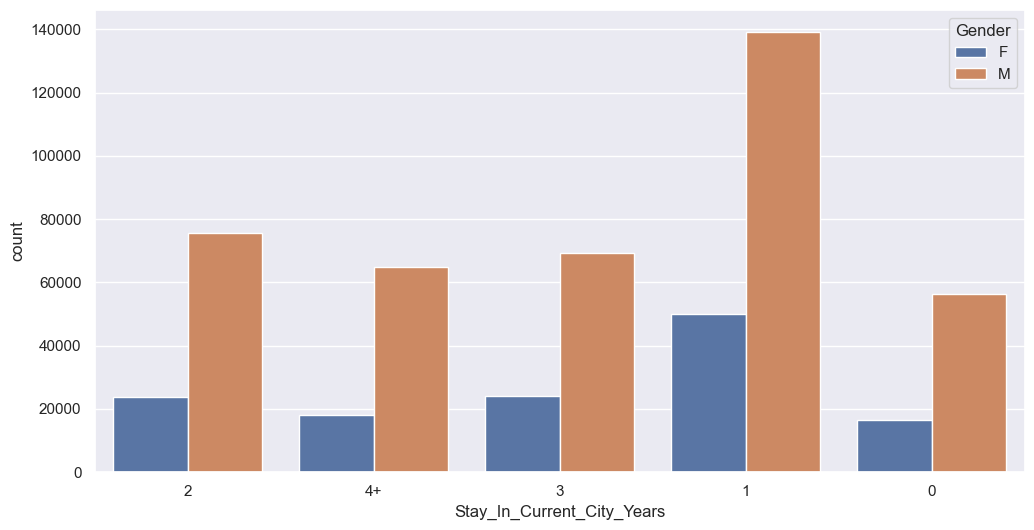

In [40]:
sns.countplot(x="Stay_In_Current_City_Years",hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

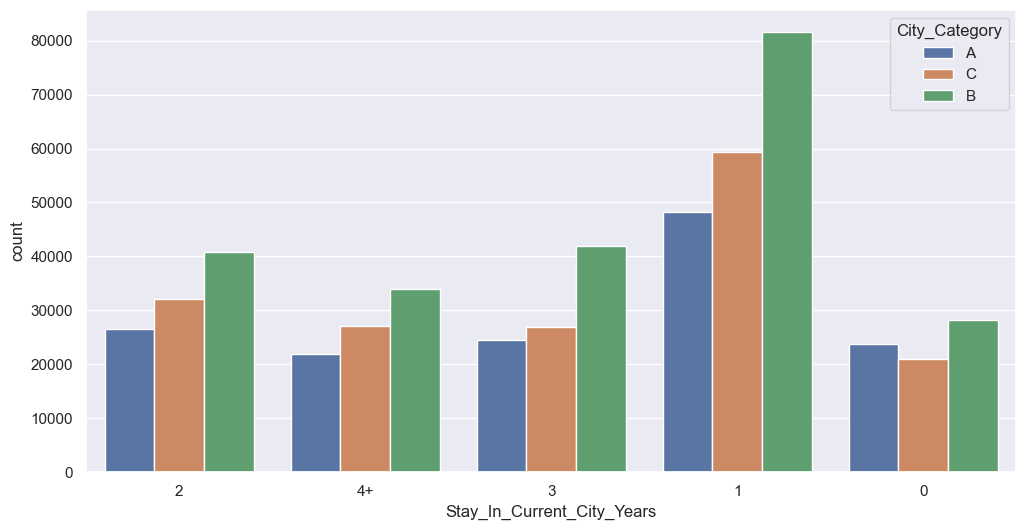

In [41]:
sns.countplot(x="Stay_In_Current_City_Years",hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

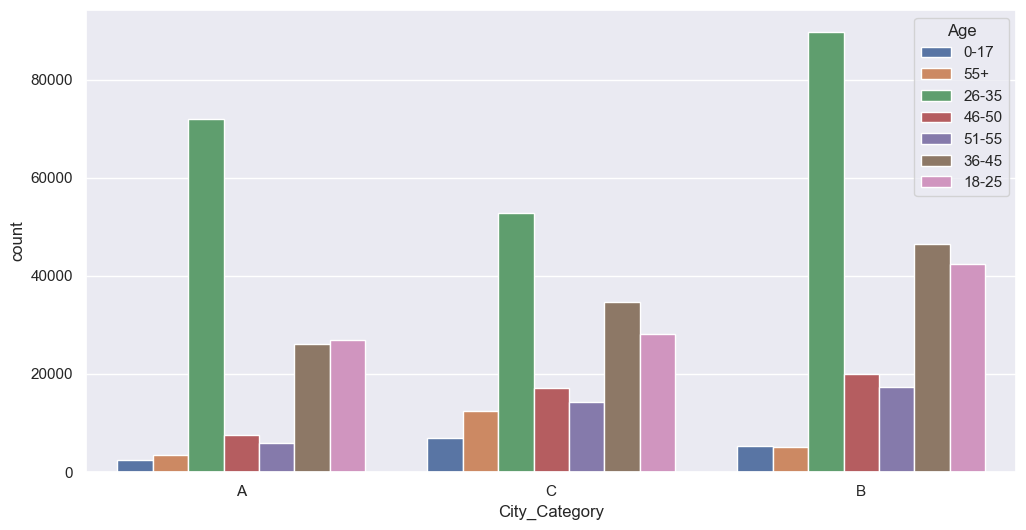

In [42]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

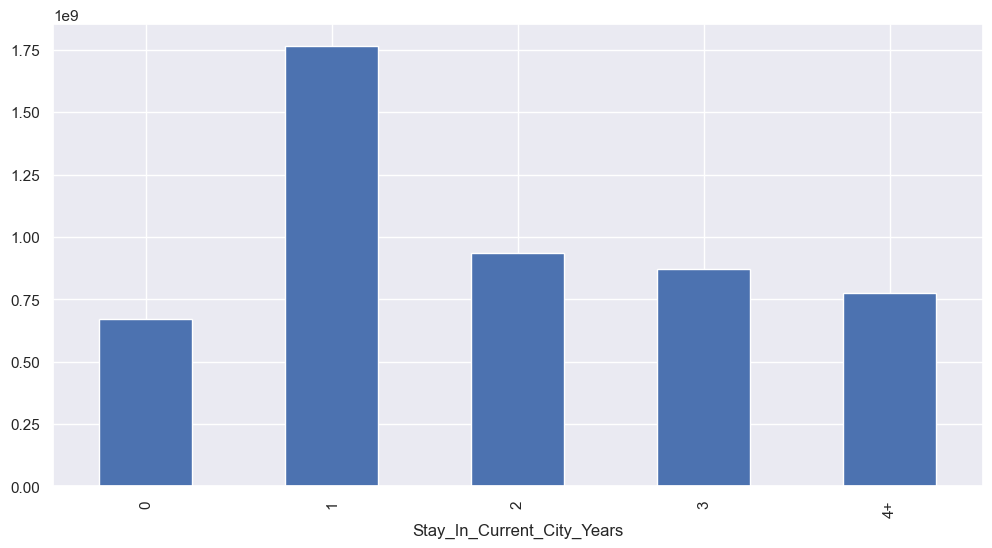

In [47]:
df.groupby('Stay_In_Current_City_Years').sum()["Purchase"].plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

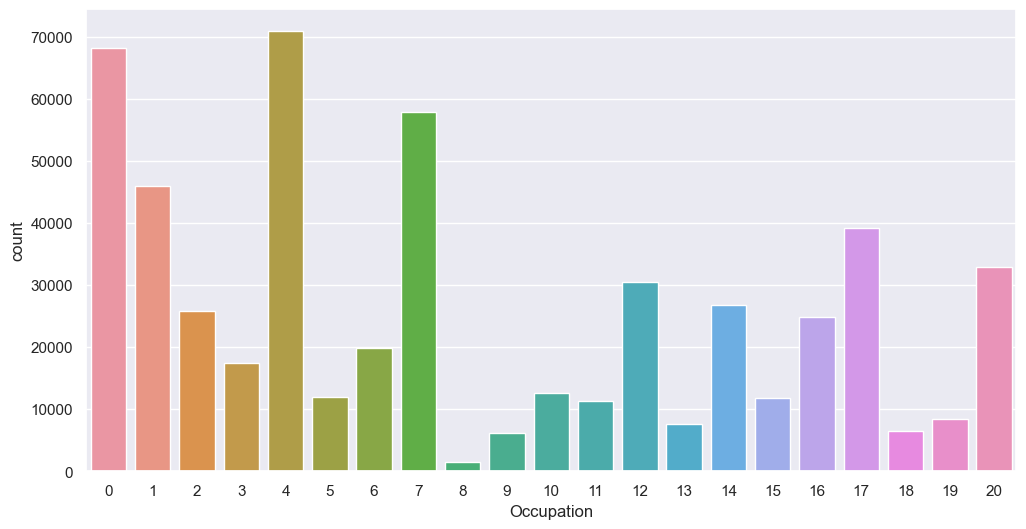

In [49]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

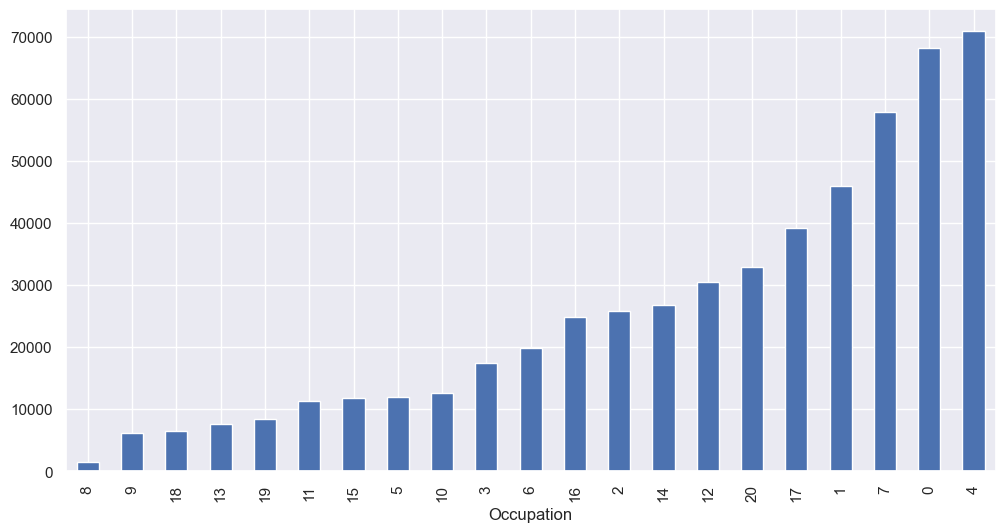

In [50]:
df.groupby("Occupation").size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

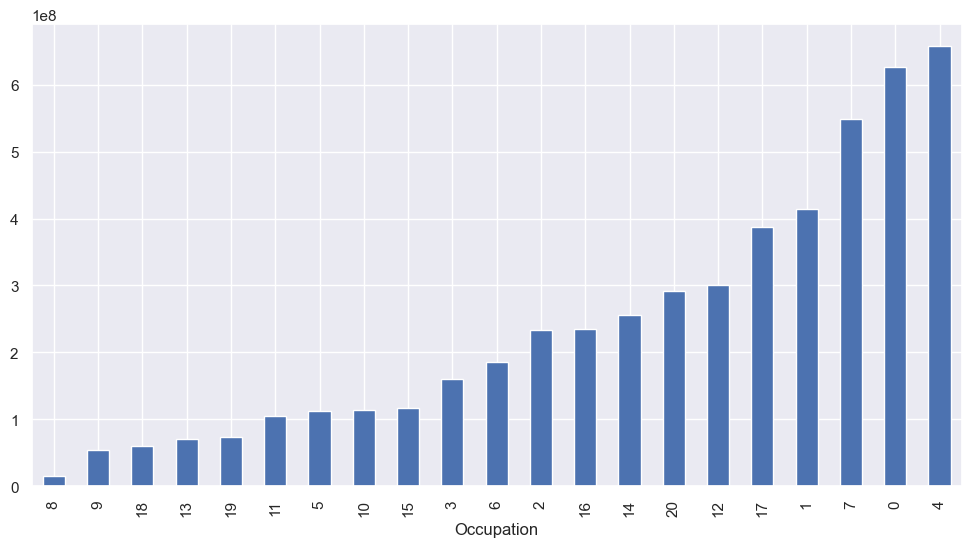

In [51]:
df.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

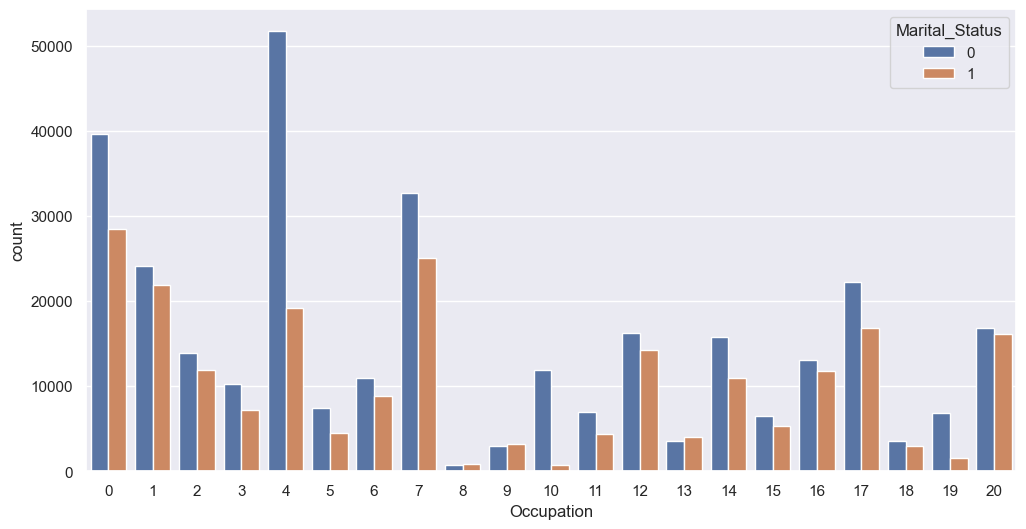

In [56]:
sns.countplot(x="Occupation",hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

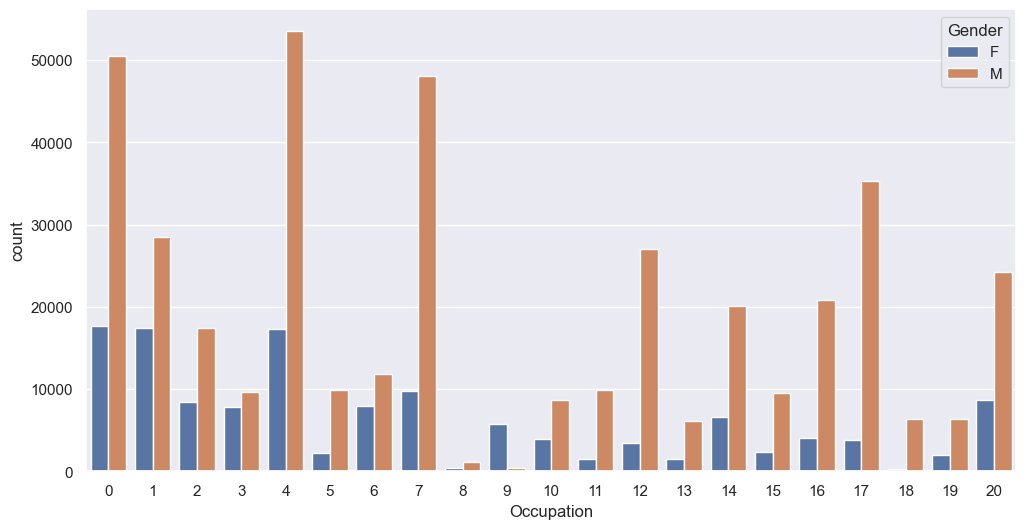

In [57]:
sns.countplot(x="Occupation",hue='Gender',data=df)

<Axes: xlabel='Occupation'>

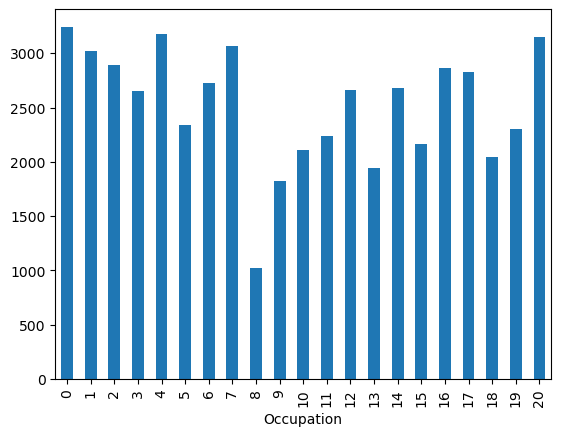

In [7]:
df.groupby('Occupation').nunique()["Product_ID"].plot(kind='bar')

<Axes: xlabel='Occupation'>

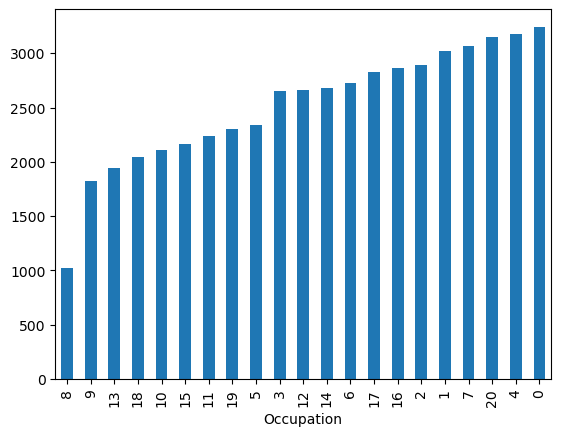

In [8]:
df.groupby('Occupation').nunique()["Product_ID"].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

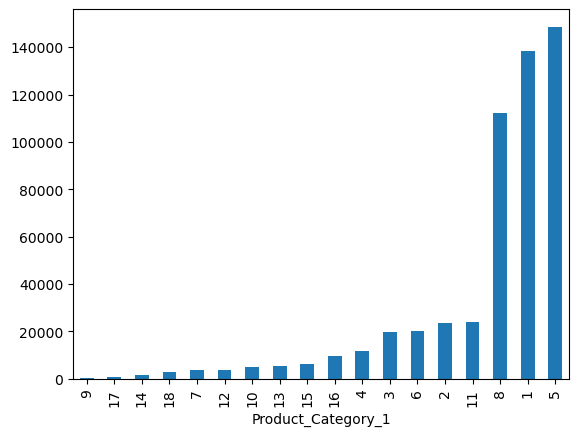

In [11]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

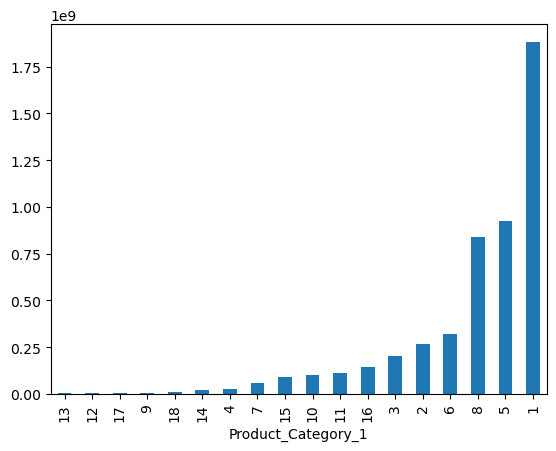

In [13]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

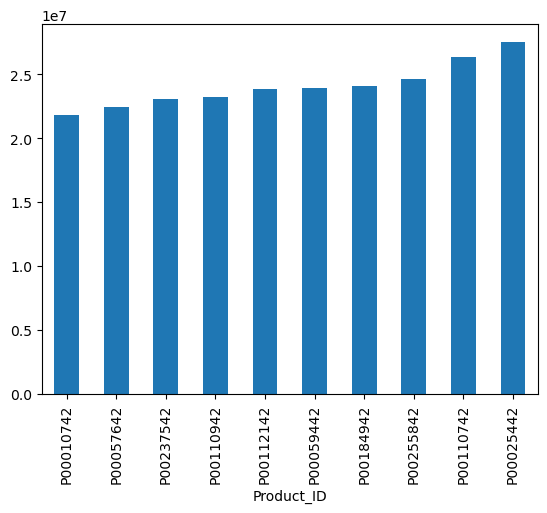

In [14]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

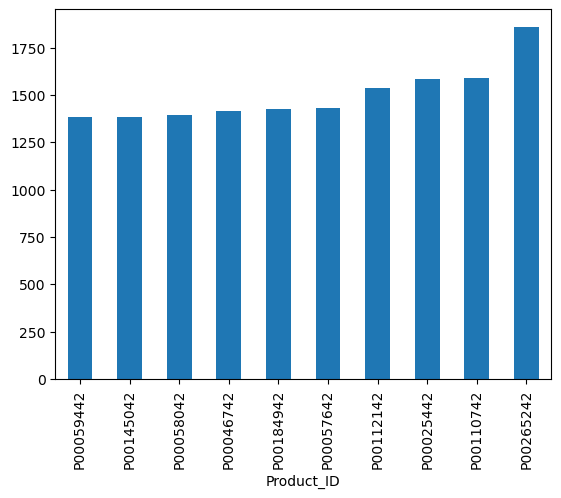

In [15]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

# Combining Gender and Marital Status

In [23]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+str(df['Marital_Status'][i]))

df["MaritalGender"]=l

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

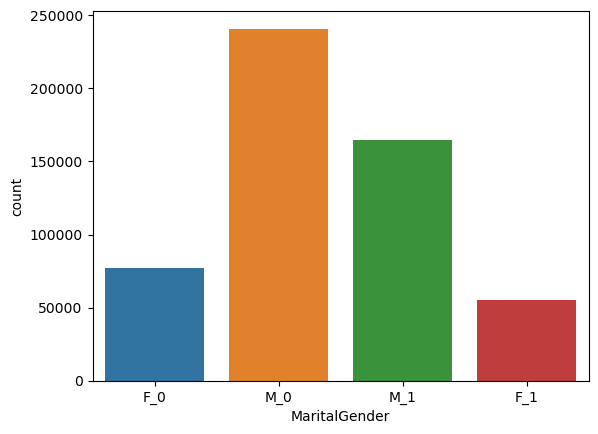

In [25]:
sns.countplot(x=df["MaritalGender"])

<Axes: xlabel='Age', ylabel='count'>

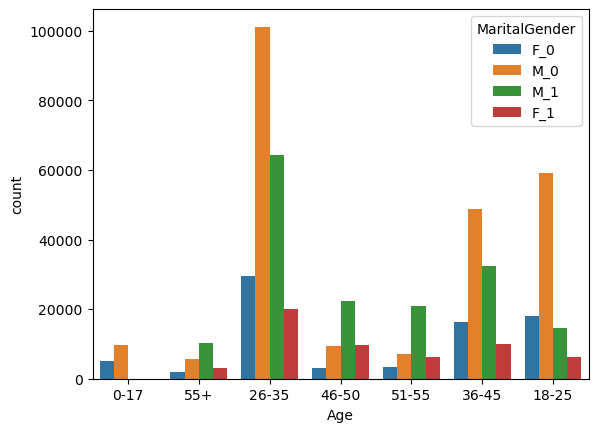

In [26]:
sns.countplot(x=df["Age"],hue=df["MaritalGender"])

<Axes: xlabel='Product_Category_1', ylabel='count'>

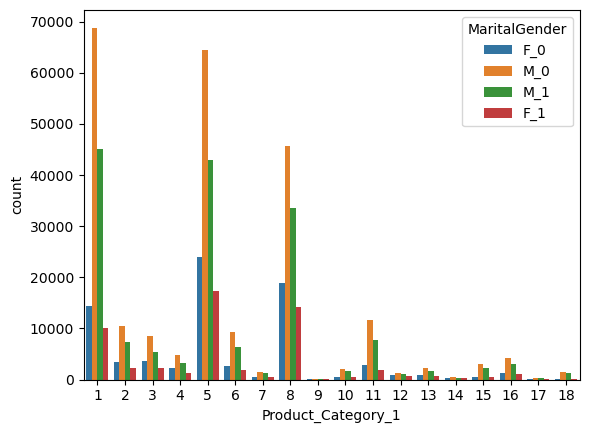

In [27]:
sns.countplot(x=df["Product_Category_1"],hue=df["MaritalGender"])

<Axes: xlabel='City_Category', ylabel='count'>

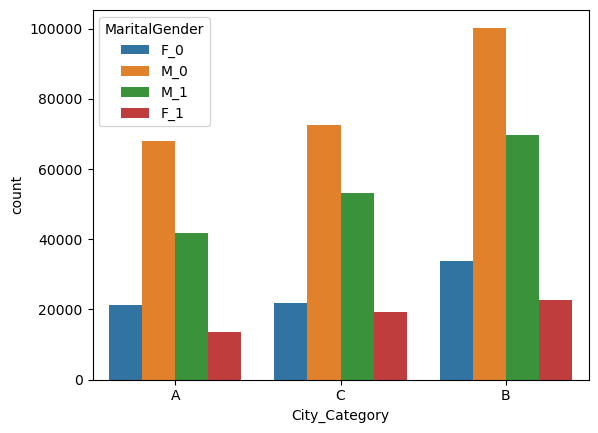

In [28]:
sns.countplot(x=df["City_Category"],hue=df["MaritalGender"])